# Analysis of Daily Bike Rentals and Profit of the Bike Rental Shop
## Prepared by Chi-Hui Chen
In this analysis, I attempt to understand and predict daily bike rentals and Calculate the profit of the bike rental shop.


This report will be broken down into five sections:

- Part 1: Load and explore the dataset.
- Part 2: Graph the dataset.
- Part 3: Prepare the data for modeling.
- Part 4: Build and evaluate models for predicting total bike rentals.
- Part 5: Conclusion





# PART 1: LOAD AND EXPLORE THE DATASET

Prior to beginning our analysis, we need to load the dataset and the appropriate libraries and then explore the data.

In [ ]:
#Load the libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
sns.set(style="darkgrid")

In [ ]:
#Read the CSV file with bike data.
url = 'http://bit.ly/bike-data'
df_rental_1 = pd.read_csv(url)

The output below shows all the columns in the dataset. 

And because we want to know the data of the total rentals, we create a new column called total rentals in the dataset and create a pivot table using "years" and "months" as indicates, which may be beneficial in making prediction.

In [ ]:
#Calculate the dimensions (rows and columns) in the dataset.
df_rental_1.shape

(731, 14)

In [ ]:
#List the columns in the dataset along with their data types.
df_rental_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  731 non-null    int64  
 1   date                731 non-null    object 
 2   yr                  731 non-null    int64  
 3   mnth                731 non-null    int64  
 4   weekday             731 non-null    int64  
 5   season              731 non-null    int64  
 6   holiday             731 non-null    int64  
 7   working_day         731 non-null    int64  
 8   temp                731 non-null    float64
 9   atemp               731 non-null    float64
 10  hum                 731 non-null    float64
 11  windspeed           731 non-null    float64
 12  casual_rentals      731 non-null    int64  
 13  registered_rentals  731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [ ]:
#Preview the first 5 records of the dataset.
df_rental_1.head(5)

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518


In [ ]:
#Create a new column called "total_rentals" that sums the "casual_rentals" and "registered_rentals" columns.
df_rental_1['total_rentals'] = df_rental_1['casual_rentals'] + df_rental_1['registered_rentals']

In [ ]:
#Confirm this new column was calculated correctly by previewing a few records.
df_rental_1.head()

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df2 = df_rental_1.iloc[:,1:4]
df2.head()

,date,yr,mnth
0,1/1/2011,0,1
1,1/2/2011,0,1
2,1/3/2011,0,1
3,1/4/2011,0,1
4,1/5/2011,0,1


In [ ]:
#Generate descriptive stats for the numeric columns in the dataset.
df_rental_1.describe()

,ID,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,2.496580,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,1.110807,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,3.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,3.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,4.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#Create a pivot table that has "yr" and "mnth" as indices (in that order) and that sums and averages "total rentals".
pd.pivot_table(df_rental_1, index=['yr', 'mnth'], values=['total_rentals'], aggfunc=[np.sum, np.mean])

sum          mean
        total_rentals total_rentals
yr mnth                            
0  1            38189   1231.903226
   2            48215   1721.964286
   3            64045   2065.967742
   4            94870   3162.333333
   5           135821   4381.322581
   6           143512   4783.733333
   7           141341   4559.387097
   8           136691   4409.387097
   9           127418   4247.266667
   10          123511   3984.225806
   11          102167   3405.566667
   12           87323   2816.870968
1  1            96744   3120.774194
   2           103137   3556.448276
   3           164875   5318.548387
   4           174224   5807.466667
   5           195865   6318.225806
   6           202830   6761.000000
   7           203607   6567.967742
   8           214503   6919.451613
   9           218573   7285.766667
   10          198841   6414.225806
   11          152664   5088.800000
   12          123713   3990.741935

In [ ]:
#Determine whether or not there are any missing values in the dataset.
df_rental_1.isnull().sum()

ID                    0
date                  0
yr                    0
mnth                  0
weekday               0
season                0
holiday               0
working_day           0
temp                  0
atemp                 0
hum                   0
windspeed             0
casual_rentals        0
registered_rentals    0
total_rentals         0
dtype: int64

# PART 2: GRAPH THE DATASET

Prior to building a predictive model, we graph the dataset to better understand total bike rentals.

Based on the chart below, we can understand the distribution of bike rentals everyday. People normally rent 4000-5000 bikes per day.

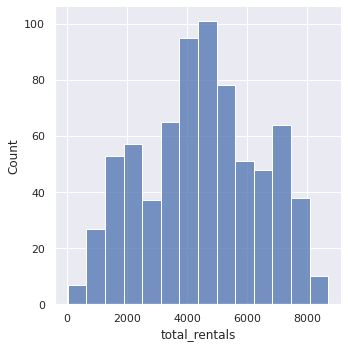

In [ ]:
#Create a histogram to visualize the distribution of data in the "total_rentals" column.
sns.displot(df_rental_1, x="total_rentals");

Based on the scatterplot below, we can understand the types of bike rentals on weekday versus weekends. It appears that on working day people tend to do registered rentals. On the other hand, people tend to do casual rentals on weekday.

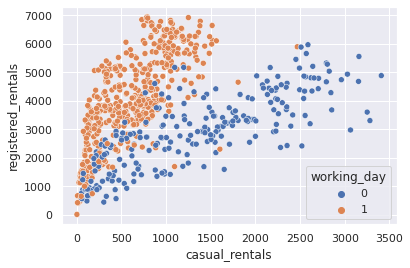

In [ ]:
#Generate a scatterplot that has "casual rentals" on the x-axis and "registered rentals" on the y-axis. Then color the datapoints based on the "working day".
sns.scatterplot(x="casual_rentals", y="registered_rentals", hue="working_day", data=df_rental_1);

Based on the swarmplot below, we can understand how the different seasons affects the data of bike rentals. We can see that people tend to rent the bikes during spring and summer.

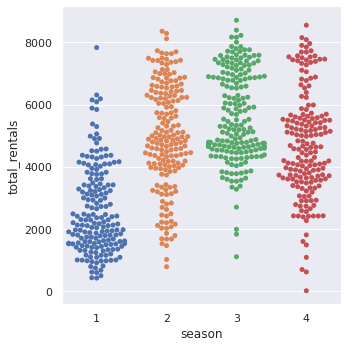

In [ ]:
#Generate a swarmplot to explore the total rentals by season.
sns.catplot(x="season", y="total_rentals", kind="swarm", data=df_rental_1);

Based on the line plot below, we can understand average daily rentals by month and year. It appears that there is a significantly increase of bike rentals in the second year, and people tend to rent between June to September.

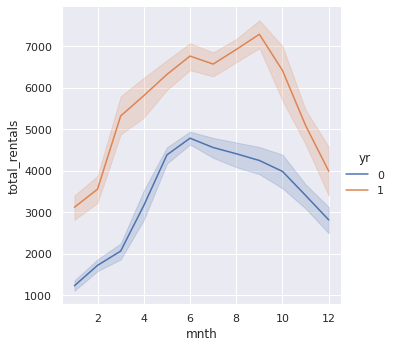

In [ ]:
#Generate a line plot that shows average daily rentals by month and split the lines by year.
sns.relplot(x="mnth", y="total_rentals", hue="yr", kind="line", data=df_rental_1);

Based on the pairplot below, we can see the relationship between totals rentals and weather indicators. 

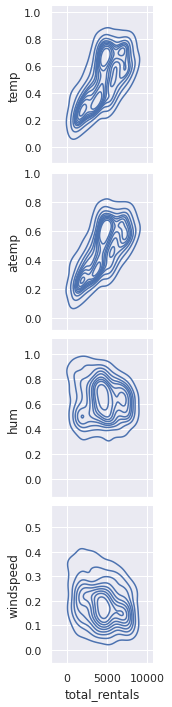

In [ ]:
#Generate a pairplot to show the relationship between "total rentals" and the weather indicators.
sns.pairplot(
    df_rental_1,
    x_vars=["total_rentals"],
    y_vars=["temp", "atemp", "hum", "windspeed"],
    kind="kde"
)

Based on the heatmap below, we can see the correlation between total rentals and weather indicators. It appears that temperature and atemp have high positive correlation with the bike rentals.

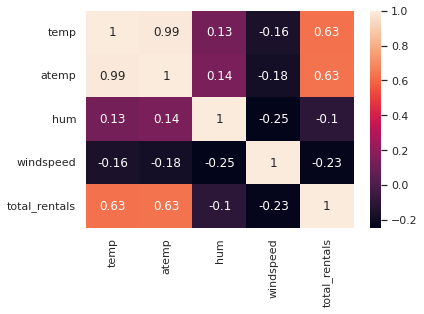

In [ ]:
#Generate a heatmap to visualize the correlation between "total rentals" and the weather indicators.
df_rental_2 = df_rental_1.drop(columns=['ID',	'date',	'yr', 'mnth',	'weekday', 'season', 'holiday',	'working_day', 'casual_rentals', 'registered_rentals'])
sns.heatmap(df_rental_2.corr(), annot=True);


# PART 3: PREPARE THE DATA FOR MODELING

To build a predictive model, we set our variables and split the data into training and test sets.

In [ ]:
#Before building our regression model, separate the independent variables (X) from the dependent variable (y).
X = df_rental_1[['temp']]
y = df_rental_1['total_rentals']

In [ ]:
#Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#Train ("fit") the regression model using the training data.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Identify the intercepts of the regression model.
print(model.intercept_)

1327.930810368468


In [ ]:
#Identify the coefficients of the regression model.
print(model.coef_)

[6463.96764523]


#Part 4: BUILD AND EVALUATE MODELS FOR PREDICTING TOTAL BIKE RENTALS 


We can see in the regression model below, when we assume temperature=0.3, we get about 3267 bike rentals that day, which is lower than usual. 

In [ ]:
#Use the regression model to predict total rentals when temp=0.30.
new_X = [[0.3]]
model.predict(new_X)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3267.12110394])

We make prediction for all bike rentals in the test data using each element in it.

In [ ]:
#Use the regression model to predict total bike rentals in the test data. Store predictions in a variable called "y_pred".
y_pred = model.predict(X_test)
y_pred

array([5766.52408142, 6175.90654429, 2836.18777293, 2570.13732862,
       3536.45524381, 4279.81152301, 4365.99560363, 4252.87616984,
       4155.91665516, 2643.20601889, 2260.99161202, 3428.72029507,
       3683.06449397, 5901.18791937, 6154.36214013, 5432.55026509,
       5098.57644877, 3843.49370696, 3288.6655081 , 4110.24872374,
       5895.80343432, 2965.46712584, 3391.01597179, 5804.22840469,
       2378.32555272, 5437.93475014, 6811.52787475, 5572.60505206,
       4748.44917729, 5098.57644877, 2222.11084664, 5561.829618  ,
       4215.17184656, 5820.38832381, 3741.14324327, 3369.46510367,
       6348.28116949, 6897.71841933, 4010.47738314, 4290.58049311,
       5012.39236815, 3677.44084212, 5314.04634625, 3961.9976258 ,
       5965.82759582, 4651.48966262, 3092.87192813, 5680.33353684,
       3035.49775131, 2963.59257522, 5933.5077576 , 6122.04230191,
       4328.29128035, 5567.21410304, 5917.34783848, 4295.97144213,
       3428.72029507, 4274.420574  , 6052.01167644, 3046.26672

In [ ]:
#Generate the R squared.
metrics.r2_score(y_test, y_pred)

0.37540464616240443

# Part 5: CONCLUSION

From the data analysis above, we can see that temperature affects the daily bike rentals. When temperature is low, people are less likely to rent a bike. So in the winter, we have fewer bike rentals compare with bike rentals in spring or summer. When manager is planning how to set the number of bike everyday, you can form your decision based on temperature and whether it's a weekday or not.